<a href="https://colab.research.google.com/github/yudhiesh1997/Hands-On-Machine-Learning/blob/master/handsonMLCH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models 


## Linear Regression 

A linear model makes a prediction by simply computinng a weighted sum of the input features 

y = hθ x = θ · x

To train a Linear Regression model we need to find the value of θ that minimizes the RMSE or MSE 

It is easier to minimize the MSE over the RMSE as the value that minizes a function also minimizes its square roots 


## Normal Equation 

To find the value that minimizes the value of θ using a closed-form solution(gives the answer directly) you can use the *Normal Equation*

In [ ]:
import numpy as np 

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.40765215],
       [10.58661709]])

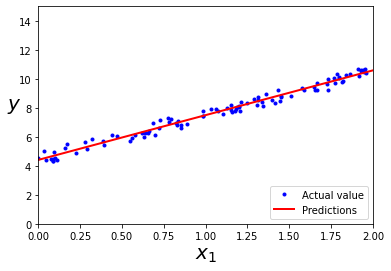

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X,y, 'b.', label="Actual value")
plt.plot(X_new, y_predict, 'r-',linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation = 0, fontsize=20)
plt.axis([0,2,0,15])
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.40765215]), array([[3.08948247]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.40765215],
       [10.58661709]])

## Gradient Descent 

Gradient Descent tweaks parameters iteratively in order to minimize a cost function 

Weights are randomly initialized 

Learning rate is a hyperparameter where the larger it is the more likely it is to overshoot and the smaller it is the longer it takes to converge to a local minima 

**Important**: 
When using Gradient Descent you have to ensure all features are on a similar scale (i.e. StandardScaler) otherwise it will take a long time to converge 


**Partial Derivative**:
You need to calculate how much the cost function will change if you change θj a bit 





## Batch Gradient Descent 

The formula involves the calculations of the entire set **X** at each Gradient Descennt step.

It uses the whole batch of training data at every step. 
It is slow because of this. 

If there are a 100,000 features Gradient Descent scales well and actually performs better at training a Linera Regression model compartes to the Normal Equation or SVD decomposition. 



In [ ]:
learning_rate = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - learning_rate * gradients 

In [ ]:
theta

array([[4.3472289 ],
       [3.13787849]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

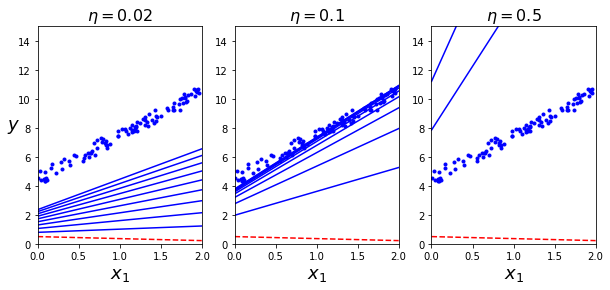

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

To find the optimal learning rate you can use Gride Search. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solu‐ tion is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ε (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum.



## Stochastic Gradient Descent 

Batch Gradient Descent is very slow as it uses the entire training set at each iteration. 

On the opposite end you have Stochastic Gradient Descent which randomly picks a random starting instance at each step and computes the gradient based on that particular instance making it much faster. 

But the stochastic nature of the algorithm results in it being much less regular compared to Batch Gradient Descent.

The cost function will bounce up and down, decreasing only on average. 

So once the algorithm stops the final parameter will be good but not optimal 

SGD has an advantage over BGD as it actually helps the algorithm jump out of a local minima and onto finding the global minima. 

The randomness is good to escape the local optima but it means the algortihm can never settle at a minimum.

**Solution**:
Gradually reduce the learning rate as the algorithm goes on. 




In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

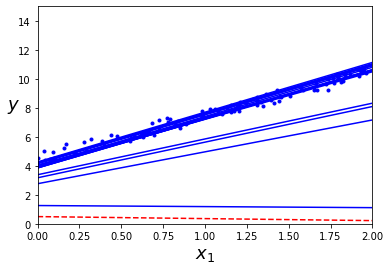

In [ ]:
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                      

## Linear Regression using Stochastic Gradient Descent 



In [ ]:
from sklearn.linear_model import SGDRegressor

reg_sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
reg_sgd.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
reg_sgd.intercept_, reg_sgd.coef_

(array([4.38628841]), array([3.10675347]))

## Mini-batch Gradient Descent 

Computes the cost function for a small batch of the training set 

**Mini-batch GD vs SDG:**

Mini-batch GD performs better due to hardware optimizations of matrix operations especially when using GPU's

It is less erratic compared to SGD especially with larger mini-batches 

Mini-batch GD will end up walking closer to the minima compared to SGD but it will be harder to escape from a local minima 





In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

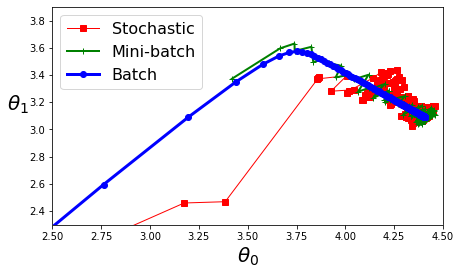

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In a nutshell: 

Batch gradient descent takes the longest out of the three but it will reach the exact position of the minimum 

SGD and Mini-batch GD both come close to the minima at a faster rate 

## Polynomial Regression 

When your data is more complex than a straight line? 

A simple way to do this is to add powers of each feature as new features. 



In [39]:
m = 100
X = 6 * np.random.rand(m, 1) -3 
y = 0.5 * X**2 + np.random.rand(m,1) 

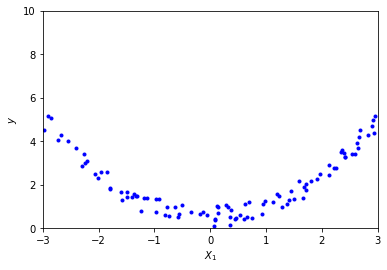

In [41]:
plt.plot(X, y, 'b.')
plt.xlabel("$X_1$")
plt.ylabel("$y$")
plt.axis([-3,3, 0,10])
plt.show()

In [50]:
from sklearn.preprocessing import PolynomialFeatures
# Change degree to change max power of 
# Degree = 3 
# a2, a3, b2, and b3, ab, a2b, and ab2.
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
                              

array([2.38942838])

In [51]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [52]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([0.5278938]), array([[-0.0195215 ,  0.49468385]]))

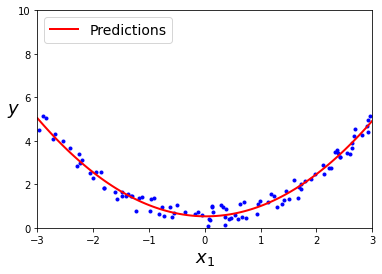

In [53]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

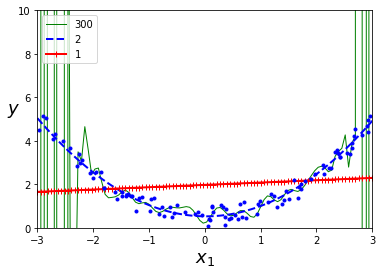

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

The high-degree Polynomial Regression overfits the curve severly compared to the lower degree ones 

But how can you tell that your model is overfitting or underfitting the data? 

One way is to use cross-validation but another way is to plot the learning curves 


In [62]:
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

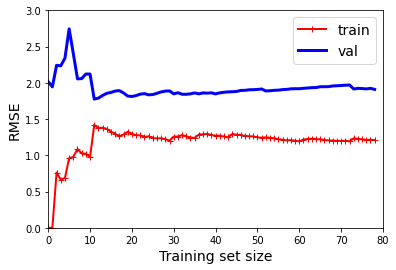

In [64]:
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show() 

From this we can see that the model will not get better performance with more data

At the start of the training the model is incapable of generalizing well, which is why the error is quite big initally 

A straight line does not do well on the data so the errors plateau



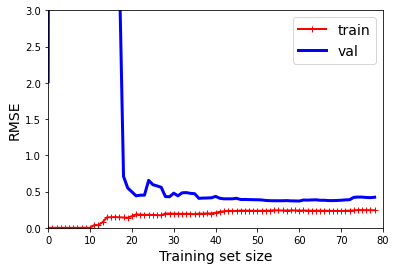

In [72]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

The error on the training data is much lower than the Linear Regression model 

The huge gap between the train error and validation error is a sign that the model is overfitting the data but with more data the model fits better


## The Bias/Variance Trade-off

*Bias*

Assuming that the data is linear when it is in fact quadratic. A high bias model will tend to underfit the data

*Variance*

This is due to the models excessive sensitivity to the data
A model with high degree of freedom is more likely to overfit the data

*Irreducible error*

This is from the noisiness of the data itself. The only way to reduce this is to clean up the data.


Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.

## Regularized Linear Models 

A good way to reduce overfitting in a model is to regularize it or constrain it : the fewer degrees of freedom it has the harder it will be to overfit the data.



## Ridge Regression 

A *regularization term* is added to the cost function. 

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible

Once the model is trained, you want to use the unregularized performance measure to evaluate the models performance. 

The hyperparameter α controls how much you want to regularize the model. If α = 0, then Ridge Regression is just Linear Regression. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

In [73]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [74]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [75]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

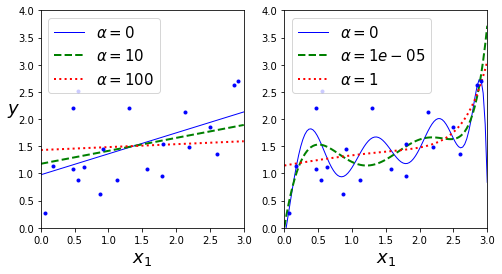

In [77]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

When the value of α is increased the line that fits the data is more flatter thus reducing the model's variane but increasing its bias.



## Lasso Regression 

Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the L1 norm of the weight vector instead of half the square of the L2 norm.

**Important:**

Lasso Regression tends to eliminate the weights of the least important features (i.e., set them to **zero**).

In other words, it automatically performs feature selection and outputs a *sparse model* (i.e., with few nonzero feature weights).




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


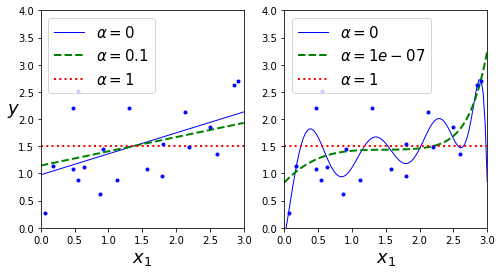

In [78]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [79]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net 

This is a middle ground between Ridge Regression and Lasso's Regression.

The regularization term r is a mix of the two and controlling it controls the mix of the ratio.

When r = 0, Elastic Net is equivalent to Ridge Regression and when r = 1, it is equivalent to Lasso Regression.

## When to use either of the three?

It is preferable to have a bit of regularization so plain Linear Regression is generally avoided. 

**Ridge is a good default**

**If you suspect that only a few of the features are useful:**
use Lasso or ElasticNet as they tend to reduce the useless features' weights down to zero. 

**In general:**
ElasticNet is prefered over Lasso as Lasso tends to behave erractically when the number of features is greater than the number of training instances or when several features are strongly correlated. 


In [80]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [81]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [82]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

## Early Stopping 

A way to regularize Gradien Descent by stopping the training once the validation error reaches a minimum. 

**With SGD and Mini-Batch GD:**
the curves are not so smooth, which is hard to know whether you have reached the minimum or not. 
One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

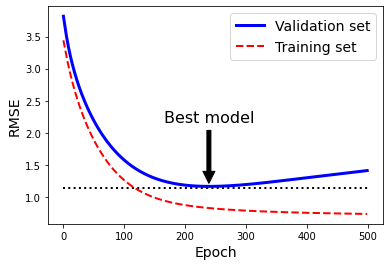

In [84]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [85]:
best_epoch, best_model


(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [86]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

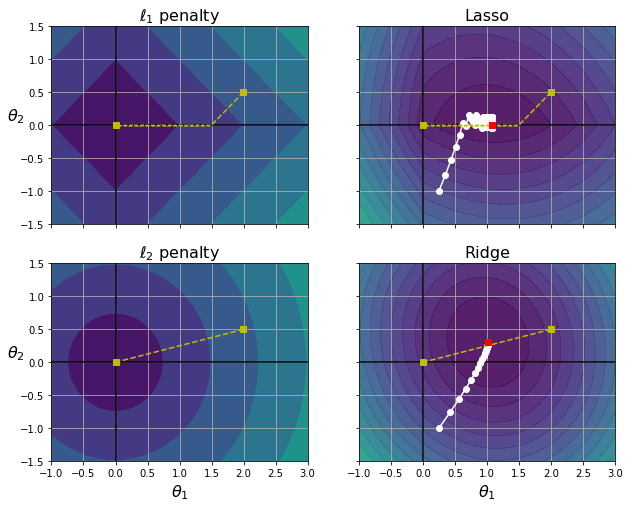

In [87]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)


plt.show()

There are two main differences with Lasso. First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent nat‐ urally slows down, which helps convergence (as there is no bouncing around). Second, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase α, but they never get eliminated entirely.

To avoid Gradient Descent from bouncing around when using Lasso, you need to gradually reduce the learning rate during training.



## Logistic Regression 

Some regression algorithms can be used for classfication with Logistic Regression being one of them.

It is commonly used to estimate the probability of something which makes it a binary classifier.

Just like Linear Regression it computes the weighted sum of the input features plus a bias term but instead of outputtig the result it outputs the log of the result. 

### Training and Cost Function 

The objective of training is to set the parameter vector theta so that the model estimates high probabilities for y = 1, and low probabilities for y = 0. 



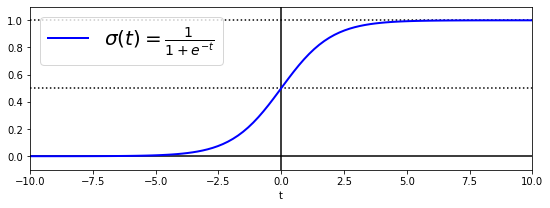

In [89]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

## Decision Boundaries 



In [90]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [91]:
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [92]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


In [93]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

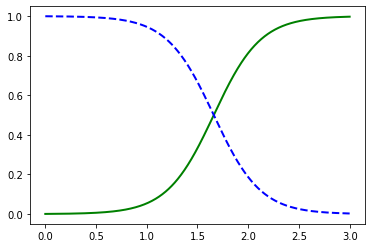

In [94]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

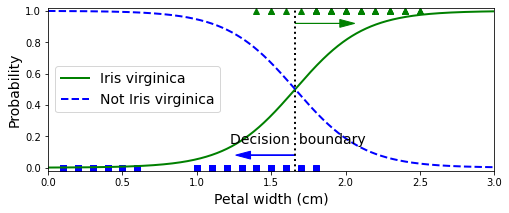

In [96]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [97]:
decision_boundary

array([1.66066066])

In [98]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

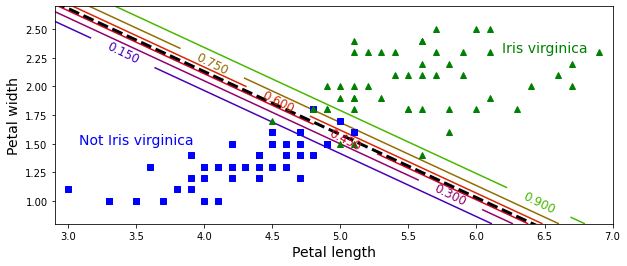

In [99]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

## Softmax Regression 

The Logistic Regression model can be generalized to support multiple classes directly without having to train multiple binary classifiers. 

The model computes a score for each each class *k*, then estimates a probability of each class by applying *softmax function* to the scores. 

Just like in Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability. 

**NOTE:**
The Softmax Regression classifier predicts only one class(i.e., multiclass but not multioutput) at a time so it cannot be used for applications such as detecting multiple faces at once. 

Use Cross entropy cost function for training as it is frequently used to measure how well a set of estimated class probabilities mathces the target classes. 




In [100]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

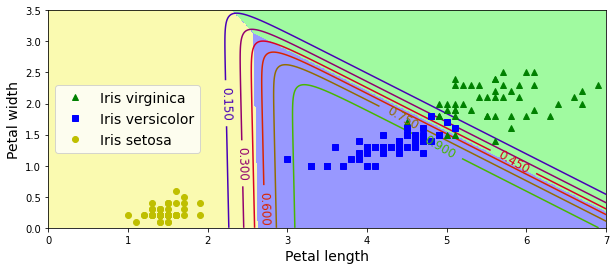

In [101]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [102]:
softmax_reg.predict([[5,2]])

array([2])

In [103]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercises:

1. Which Linear Regression training algorithm can you use if you have a training set with millions of features?

  **SGD, Mini-batch GD, Batch GD but you cannot use the Normal Equation or the SVD approach as the computational complexity grows quickly with the number of features**


2. Suppose the features in your training set have very different scales. Which algo‐ rithms might suffer from this, and how? What can you do about it?

  **If the features in the training set have very different scales then the cost function will have an elongated bowl shape which results in them taking a long time to converge. To solve this you can scale the data appropriately before training the model. SVD and Normal Equation work fine if the data is not scaled. Regularized models may converge to a suboptimal solution if not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.**

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

  **GD cannot get stuck in a local optima because the cost function is convex.**

4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?

  **If the optimization problem is convex and the learning rate is not too high then all GD algorithms will approach the global optimum and end up producing similar models. BUT, if the learning rate of SGD and Mini-batch GD is not gradually decreased then they will never truly converge and will instead jump back and forth around the global optimum.**
5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

  **If the training error is not going up then the model is overfitting. If the training error also goes up then the learning rate is too high and you need to lower it.**
6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

  **Due to their random nature there is no guarantee that the model will make progress at every single training iteration. If you stop immediately then you could be stopping too early before the optimum is reached. A better option is to save the model at regular intervals and then if it does not make much progress you can revert to the best one that you saved.**

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

  **SGD will be the fastest since it considers only one training instance at a time(maybe Mini-batch GD if the batch size is small enough). Only Batch GD will converge given enough training time.**

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

  **The model is overfitting the data. So what you can do is to reduce the degree number or you can regularize the model i.e. Ridge or Lasso.**

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regulari‐ zation hyperparameter α or reduce it?

  **The model is underfitting/high bias. Try reducing the regularization term.**

10. Why would you want to use:

  a. Ridge Regression instead of plain Linear Regression (i.e., without any regula‐ rization)?

  b. Lasso instead of Ridge Regression?

  c. Elastic Net instead of Lasso?

  **- a model with some regularization generally does better than a model without any so Ridge.**
  
  **- Lasso Regression uses an L1 penalty, which tends to push the weights down to exactly zero which leads to a sparse model. Here all the weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. If you are not sure then just use Ridge Regression.**

  **- Elastic Net is preferred over Lasso since Lasso may behave eractically in some cases. If you want Lasso without the erractic behaviour, you can just use Elastic Net with r = 1**
11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regres‐ sion classifier?
  **As these are not exclusive classes use 2 Logistic Regression classifiers.**
12. Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).